In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SD_train=pd.read_csv("C:\\Users\\ANAS\\Desktop\\Assignment\\Support Vector Machines\\SalaryData_Train(1).csv")

In [3]:
SD_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
SD_train.duplicated().sum()

3258

In [5]:
SD_train=SD_train.drop_duplicates()

In [6]:
SD_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
label_encoder=preprocessing.LabelEncoder()
SD_train['maritalstatus']=label_encoder.fit_transform(SD_train['maritalstatus'])
SD_train['age']=label_encoder.fit_transform(SD_train['age'])
SD_train['workclass']=label_encoder.fit_transform(SD_train['workclass'])
SD_train['education']=label_encoder.fit_transform(SD_train['education'])
SD_train['occupation']=label_encoder.fit_transform(SD_train['occupation'])
SD_train['relationship']=label_encoder.fit_transform(SD_train['relationship'])
SD_train['race']=label_encoder.fit_transform(SD_train['race'])
SD_train['sex']=label_encoder.fit_transform(SD_train['sex'])
SD_train['native']=label_encoder.fit_transform(SD_train['native'])
SD_train['Salary']=label_encoder.fit_transform(SD_train['Salary'])

C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\1009301728.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=SD_train, y='workclass')];


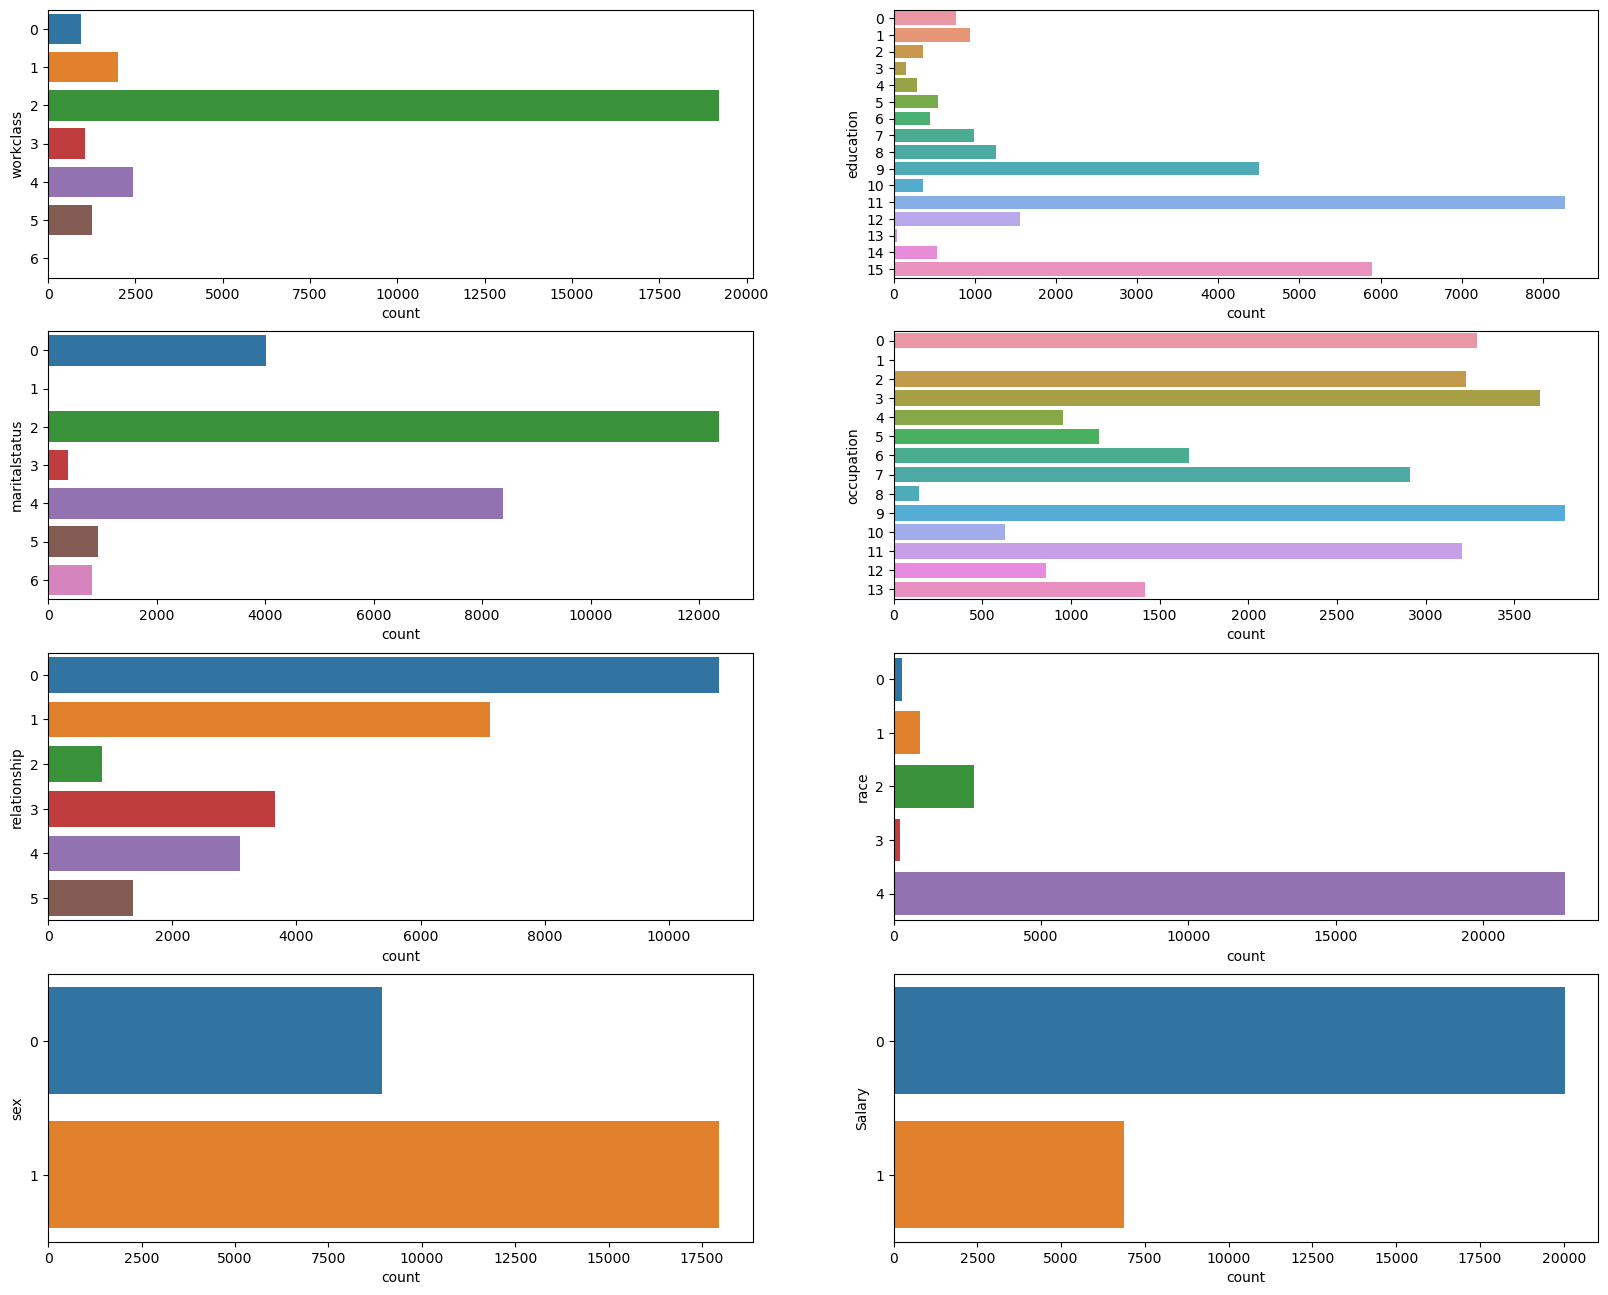

In [8]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=SD_train, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=SD_train, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=SD_train, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=SD_train, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=SD_train, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=SD_train, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=SD_train, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=SD_train, y='Salary')];

In [9]:
corre = pd.DataFrame(SD_train,columns = ['age','educationno','capitalgain','capitalloss','hoursperweek'])

In [10]:
cor=corre.corr()
cor

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038061,0.077263,0.052739,0.072596
educationno,0.038061,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077263,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052739,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072596,0.145491,0.079403,0.049093,1.000000


<Axes: >

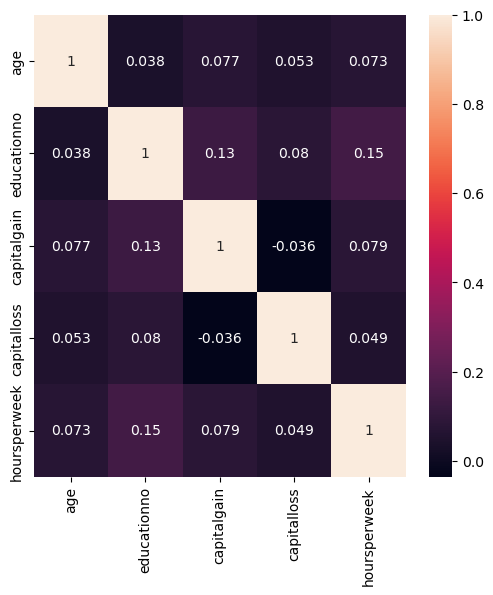

In [11]:
plt.figure(figsize=(6,6))
sns.heatmap(cor,annot=True)

C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\1459766616.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\1459766616.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(SD_train['age'],shade=True,color='g');


<Axes: xlabel='age'>

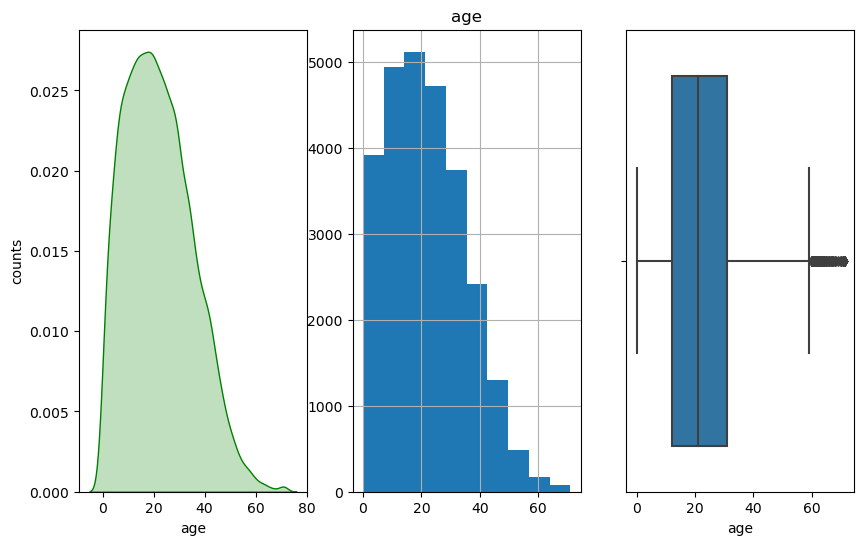

In [12]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(SD_train['age'],shade=True,color='g');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
SD_train['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=SD_train["age"])

In [13]:
SD_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,33,4,9,13,2,3,0,4,1,0,0,13,37,0
2,21,2,11,9,0,5,1,4,1,0,0,40,37,0
3,36,2,1,7,2,5,0,2,1,0,0,40,37,0
4,11,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,0


In [14]:
SD_test=pd.read_csv("C:\\Users\\ANAS\\Desktop\\Assignment\\Support Vector Machines\\SalaryData_Test(1).csv")

In [15]:
SD_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [16]:
SD_test.duplicated().sum()

930

In [17]:
SD_test=SD_test.drop_duplicates()

In [18]:
SD_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [19]:
label_encoder=preprocessing.LabelEncoder()
SD_test['maritalstatus']=label_encoder.fit_transform(SD_test['maritalstatus'])
SD_test['age']=label_encoder.fit_transform(SD_test['age'])
SD_test['workclass']=label_encoder.fit_transform(SD_test['workclass'])
SD_test['education']=label_encoder.fit_transform(SD_test['education'])
SD_test['occupation']=label_encoder.fit_transform(SD_test['occupation'])
SD_test['relationship']=label_encoder.fit_transform(SD_test['relationship'])
SD_test['race']=label_encoder.fit_transform(SD_test['race'])
SD_test['sex']=label_encoder.fit_transform(SD_test['sex'])
SD_test['native']=label_encoder.fit_transform(SD_test['native'])
SD_test['Salary']=label_encoder.fit_transform(SD_test['Salary'])

C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\300934893.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(4,2,1), sns.countplot(data=SD_test, y='workclass')];


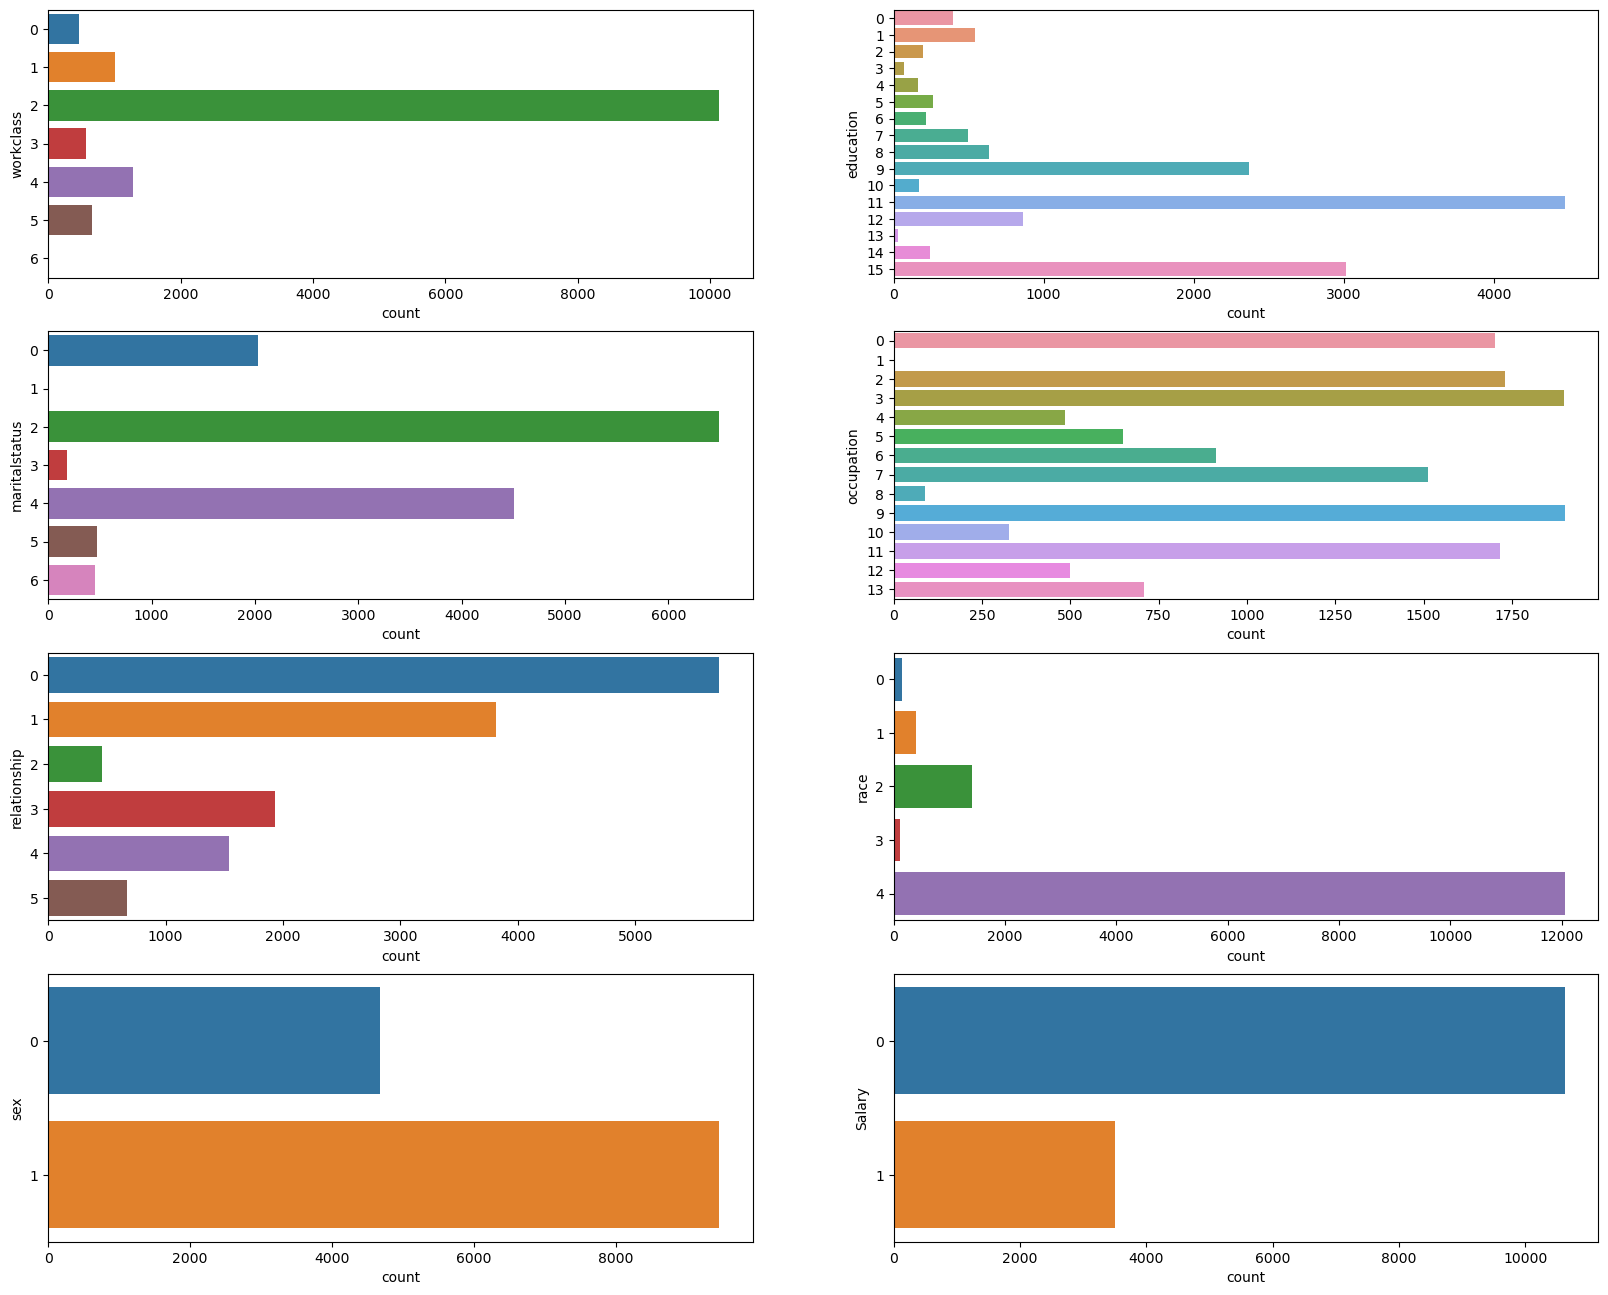

In [20]:
plt.subplots(figsize=(20,16))
[plt.subplot(4,2,1), sns.countplot(data=SD_test, y='workclass')];

[plt.subplot(4,2,2), sns.countplot(data=SD_test, y='education')];

[plt.subplot(4,2,3), sns.countplot(data=SD_test, y='maritalstatus')];

[plt.subplot(4,2,4), sns.countplot(data=SD_test, y='occupation')];

[plt.subplot(4,2,5), sns.countplot(data=SD_test, y='relationship')];

[plt.subplot(4,2,6), sns.countplot(data=SD_test, y='race')];

[plt.subplot(4,2,7), sns.countplot(data=SD_test, y='sex')];

[plt.subplot(4,2,8), sns.countplot(data=SD_test, y='Salary')];

In [21]:
corr1 = pd.DataFrame(SD_test,columns = ['age','educationno','capitalgain','capitalloss','hoursperweek'])

In [22]:
corr = corr1.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021975,0.076768,0.053158,0.088130
educationno,0.021975,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076768,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053158,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088130,0.127779,0.089512,0.056353,1.000000


<Axes: >

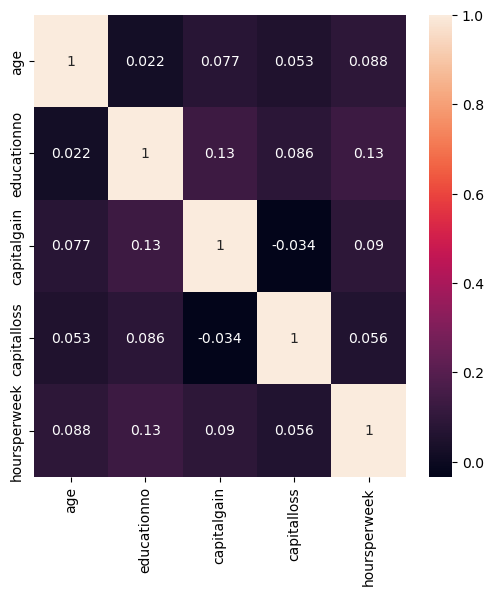

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2805858092.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2805858092.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(SD_test['age'],shade=True,color='g');


<Axes: xlabel='age'>

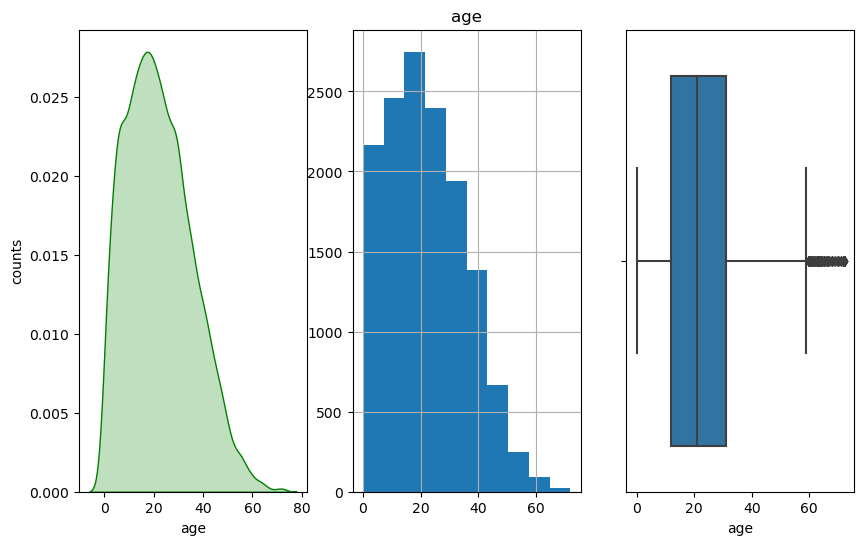

In [24]:
plt.subplots(figsize=(10,6))
plt.subplot(1,3,1)
sns.kdeplot(SD_test['age'],shade=True,color='g');
plt.xlabel('age');
plt.ylabel('counts')
plt.subplot(1,3,2)
SD_test['age'].hist()
plt.title("age")
plt.subplot(1,3,3)
sns.boxplot(x=SD_test["age"])

In [25]:
SD_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,7,4,6,3,2,1,0,0,40,37,0
1,21,2,11,9,2,4,0,4,1,0,0,50,37,0
2,11,1,7,12,2,10,0,4,1,0,0,40,37,1
3,27,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,17,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,16,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,22,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,21,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,27,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [26]:
#SVM

In [27]:
x_train=SD_train.iloc[:,0:13]
y_train=SD_train['Salary']
x_test=SD_test.iloc[:,0:13]
y_test=SD_test['Salary']

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26903, 13), (14130, 13), (26903,), (14130,))

In [29]:
clf=SVC()

parameters={'kernel':['rbf'],
           'gamma':[0.001],
           'C':[0.1]}

gsv=GridSearchCV(clf , param_grid=parameters , cv=10)

gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [0.001], 'kernel': ['rbf']})

In [30]:
gsv.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

In [31]:
gsv.best_score_

0.819053999356246

In [32]:
model=SVC(C=0.1,gamma=0.001)
model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001)

In [33]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
accuracy=accuracy_score(y_test,y_pred) * 100
print(accuracy)

82.2009907997169


In [35]:
confusion_matrix(y_test, y_pred)

array([[10567,    53],
       [ 2462,  1048]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     10620
           1       0.95      0.30      0.45      3510

    accuracy                           0.82     14130
   macro avg       0.88      0.65      0.67     14130
weighted avg       0.85      0.82      0.78     14130



In [37]:
#Foresrt fires

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
forest = pd.read_csv("C:\\Users\\ANAS\\Desktop\\Assignment\\Support Vector Machines\\forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [40]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [41]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
forest['size_category']=label_encoder.fit_transform(forest['size_category'])

In [42]:
corr=forest.iloc[:,2:10].corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000


<Axes: >

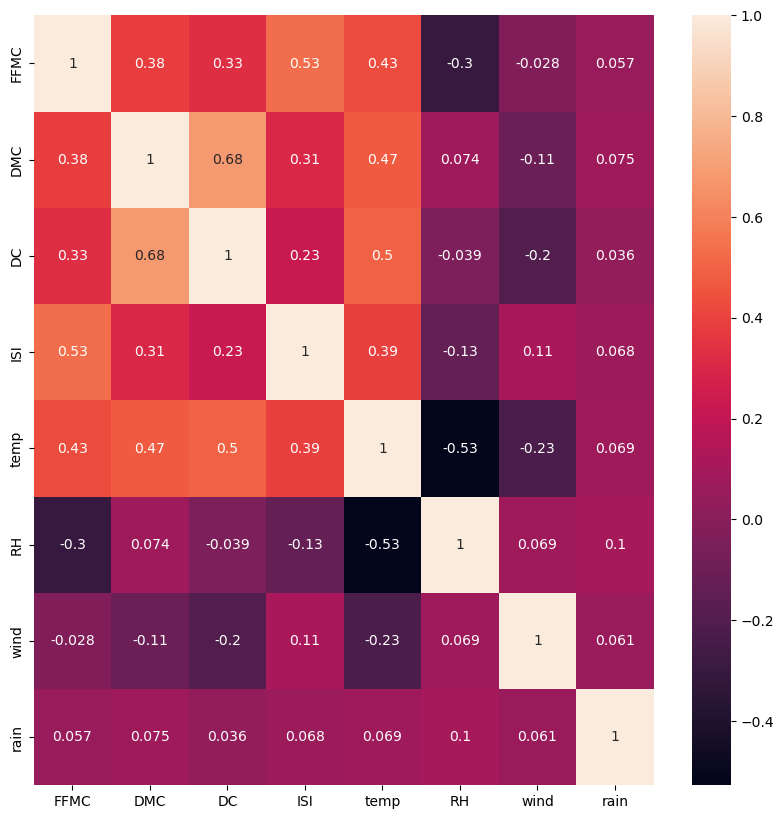

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

[<Axes: xlabel='area'>, <Axes: xlabel='area'>]

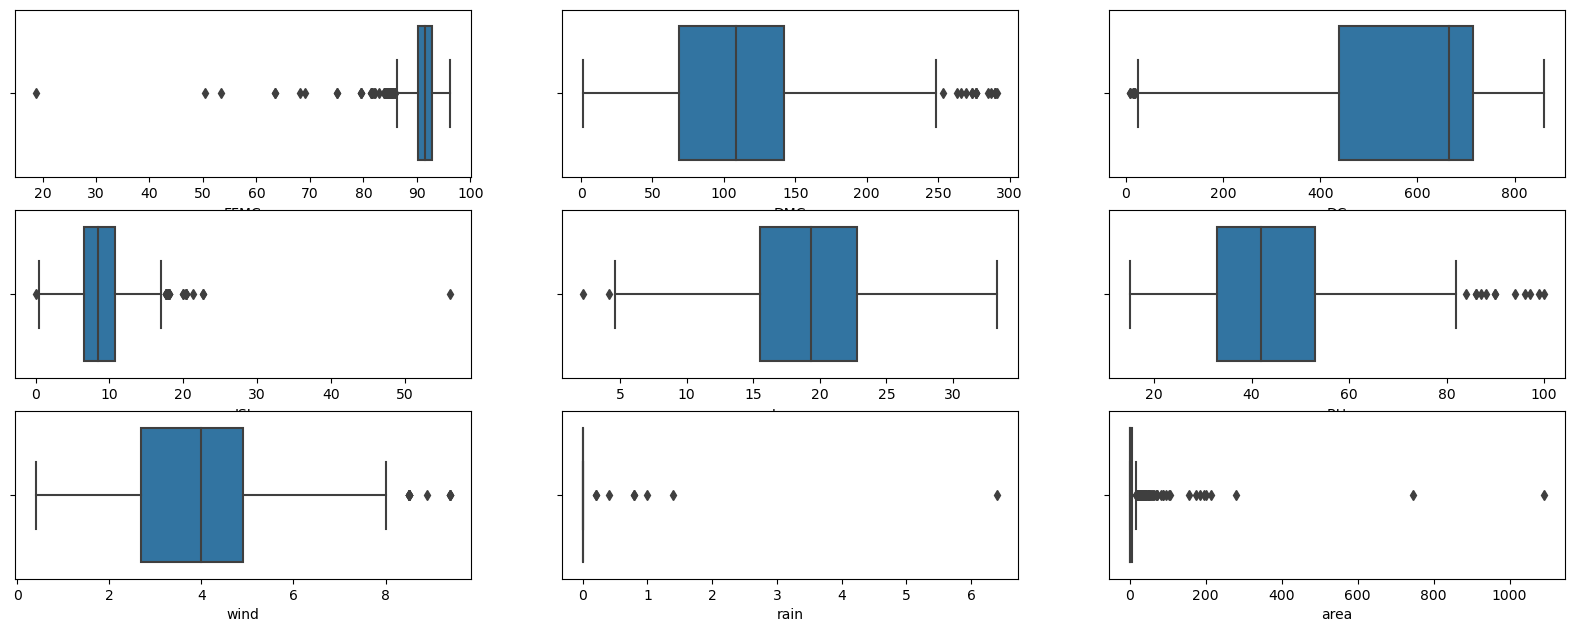

In [44]:
plt.figure(figsize=(20,10))

[plt.subplot(4,3,1), sns.boxplot(x=forest["FFMC"])];

[plt.subplot(4,3,2), sns.boxplot(x=forest["DMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=forest["DC"])];

[plt.subplot(4,3,4), sns.boxplot(x=forest["ISI"])];

[plt.subplot(4,3,5), sns.boxplot(x=forest["temp"])];

[plt.subplot(4,3,6), sns.boxplot(x=forest["RH"])];

[plt.subplot(4,3,7), sns.boxplot(x=forest["wind"])];

[plt.subplot(4,3,8), sns.boxplot(x=forest["rain"])];

[plt.subplot(4,3,9), sns.boxplot(x=forest["area"])]

C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2925381619.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='g',shade=True)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2925381619.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='g',shade=True)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2925381619.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(forest[column],color='g',shade=True)
C:\Users\ANAS\AppData\Local\Temp\ipykernel_9084\2925381619.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabor

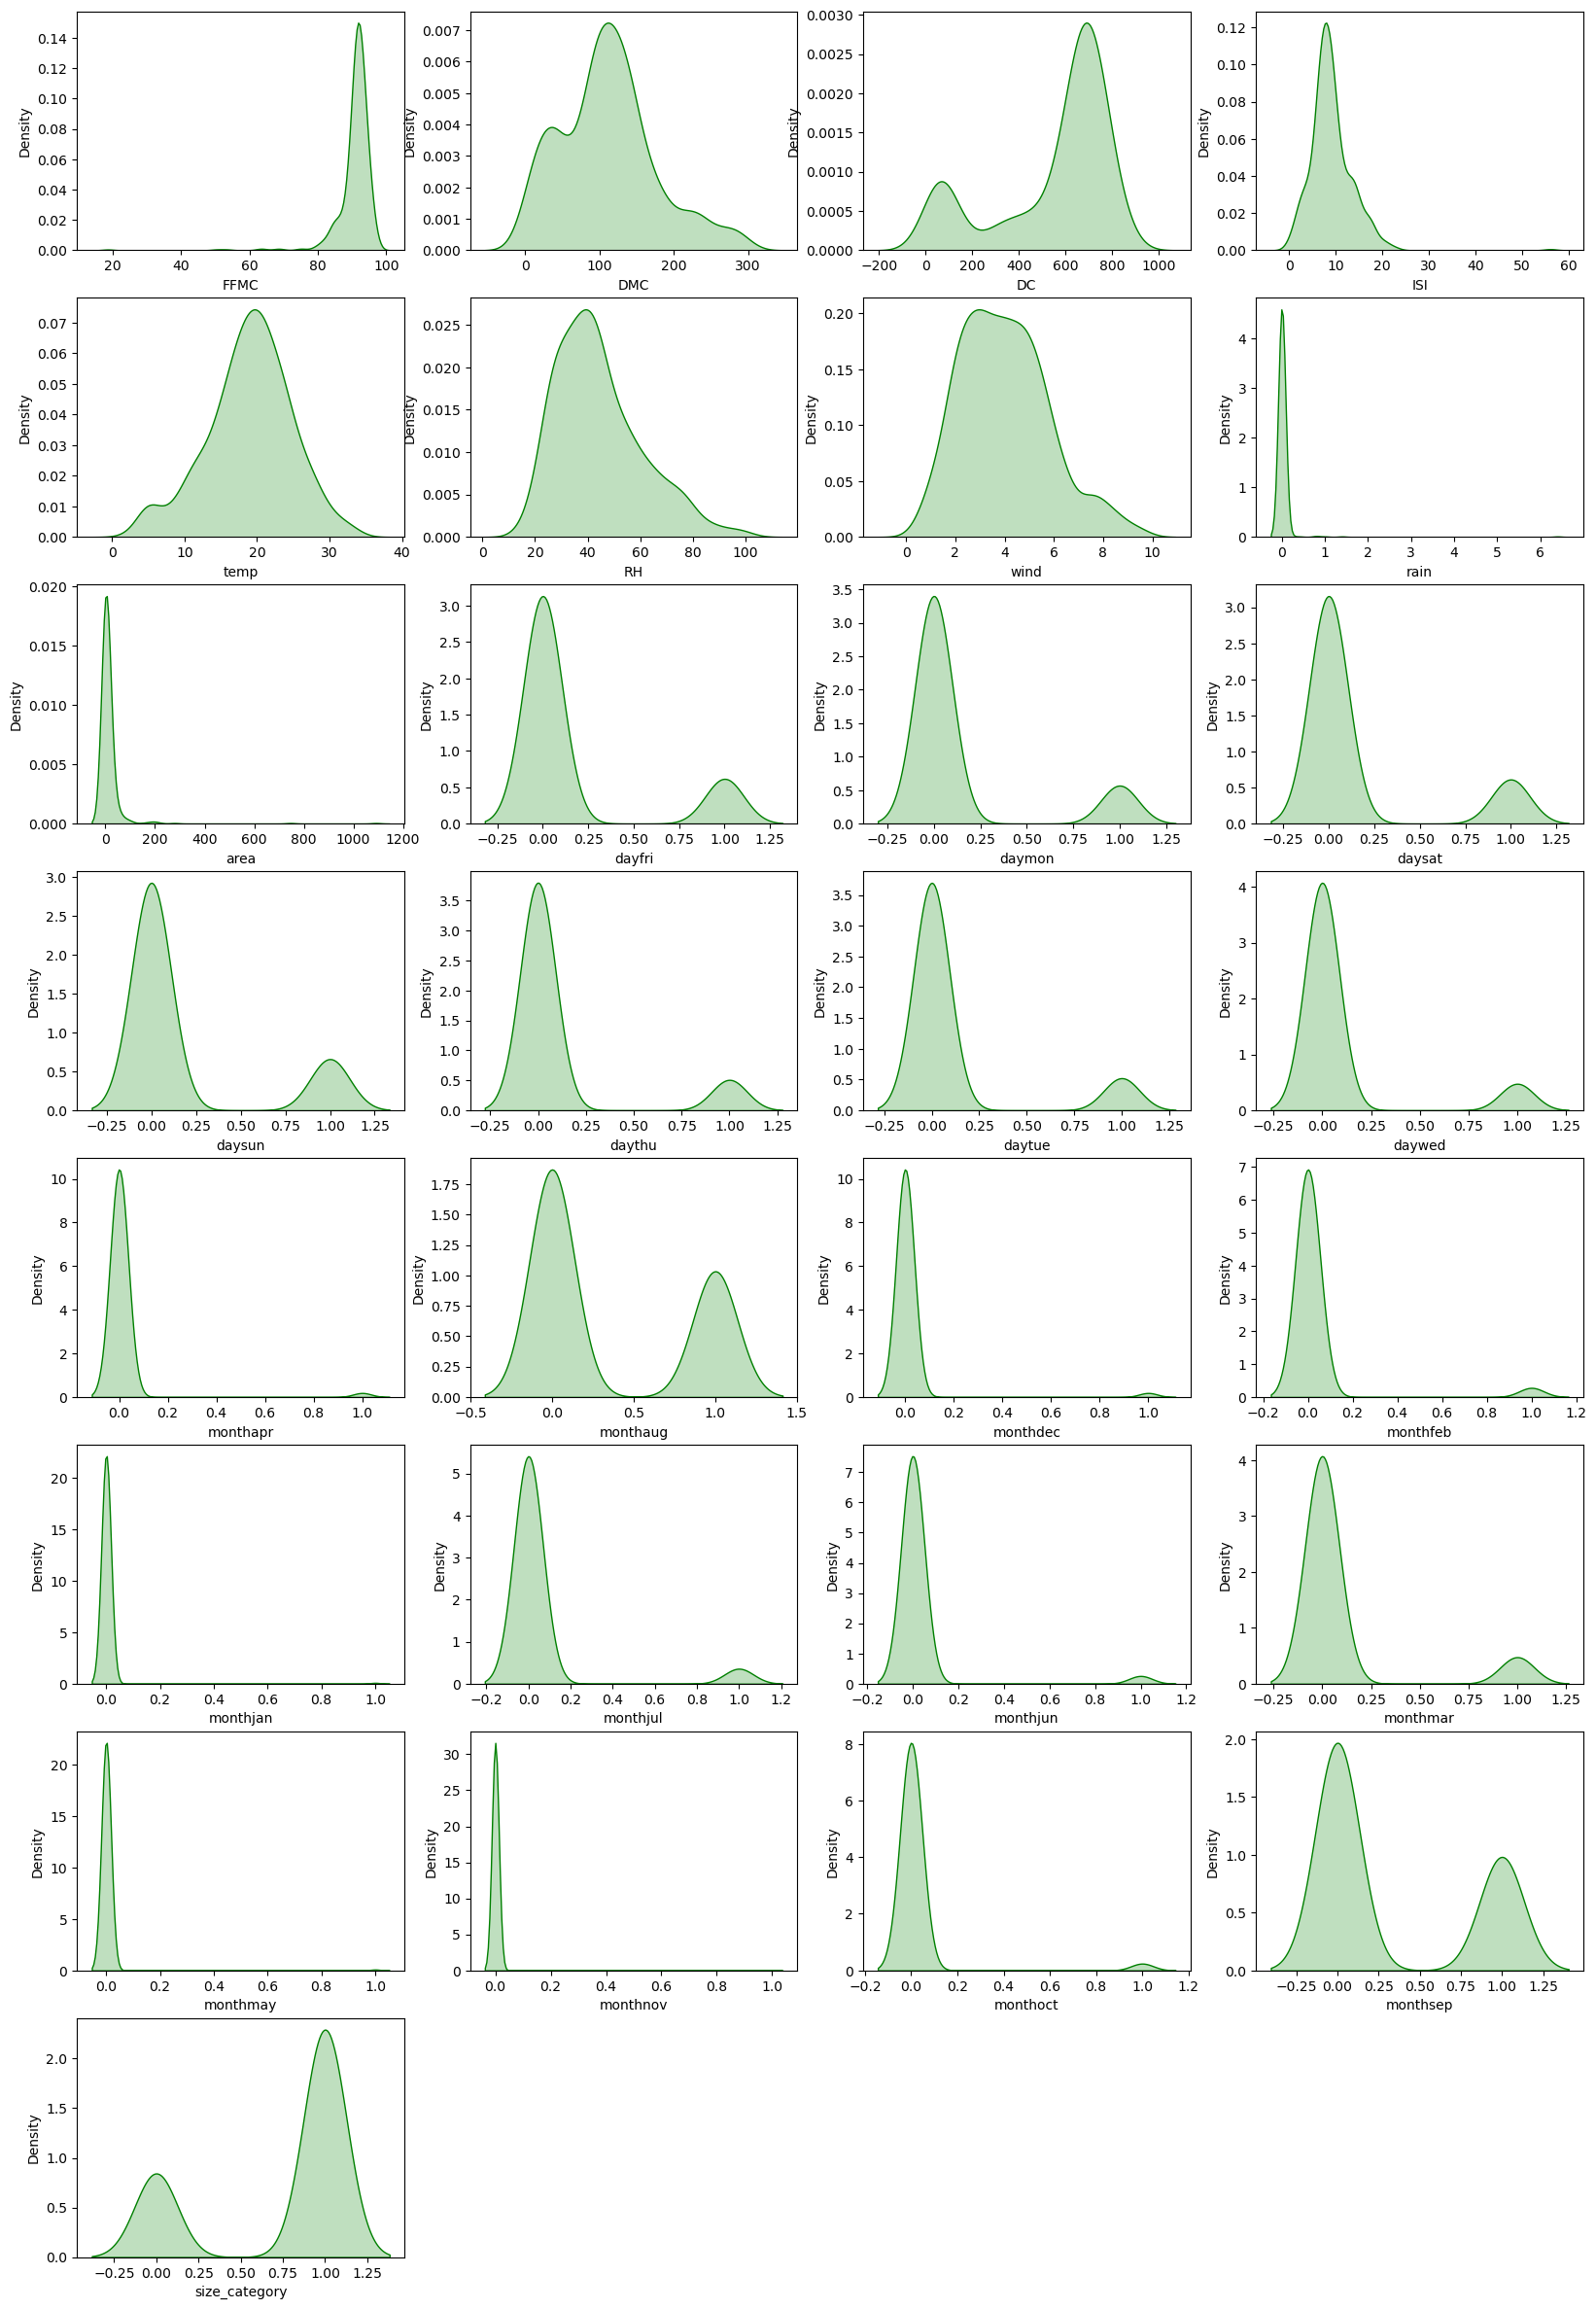

In [45]:
no_columns = forest.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(forest[column],color='g',shade=True)

In [46]:
X = forest.iloc[:,2:10]
Y = forest.iloc[:,-1]

In [47]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [48]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 8), (361,), (156, 8), (156,))

In [51]:
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 1/10; 1/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.703 total time=   0.0s
[CV 2/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 2/10; 1/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 3/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 3/10; 1/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 4/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 4/10; 1/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 5/10; 1/10] END C=0.001, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 6/10; 1/10] START C=0.001, gamma=0.01, kernel=linear........................
[CV 6/10; 1

[CV 1/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.703 total time=   0.0s
[CV 2/10; 6/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 2/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 3/10; 6/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 3/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 4/10; 6/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 4/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10; 6/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 5/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 6/10; 6/10] START C=0.001, gamma=0.5, kernel=linear.........................
[CV 6/10; 6/10] END C=0.001, gamma=0.5, kernel=linear;, score=0.722 total time=   0.0s
[CV 7/10; 6/10] START C=0.001, gamma=0.5, kernel=linear..................

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [52]:
gsv.best_params_

{'kernel': 'linear', 'gamma': 0.01, 'C': 10}

In [53]:
gsv.best_score_

0.7201951951951953

In [54]:
clf = SVC(kernel='rbf',C=0.1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 76.28205128205127


array([[  0,  37],
       [  0, 119]], dtype=int64)